### Project Number: 0005
### Project Title: Data Scientist Job Market in the U.S


# **STAGE 4. DATA WRANGLING**

### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

---

In [2]:
data_path = r'D:/Data_Science_Project/1. Data Wrangling/[0005] Project 3 - Data Scientist Job Market in the U.S'

In [3]:
# Загрузка и проверка данных 
data = pd.read_feather(data_path + '/alldata_prepated.file')

# Проверка результата 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   position     6953 non-null   category
 1   company      6953 non-null   category
 2   description  6953 non-null   category
 3   reviews      5326 non-null   float64 
 4   location     6953 non-null   category
dtypes: category(4), float64(1)
memory usage: 792.6 KB


## SECTION 4.1 CLEAN DATA


In [4]:
# Функция коплексной оценки качества данных 
def verify_data_quality (evaluated_dataset):
    # Проверка типов данных
    print("Типы данных:\n{}\n".format(evaluated_dataset.dtypes) + '_' * 100+ '\n')
    # Проверка наличия значений NaN
    print("Пропущенные значения:\n{}\n".format(evaluated_dataset.isnull().sum().sum()) + '_' * 100+ '\n')
    # Количество значений, отличных от NaN
    print("Количество значений, отличных от NaN:\n{}\n".format(evaluated_dataset.count().sum()) + '_' * 100+ '\n')
    # Поиск дублирующих строк 
    print("Дублирующих строк:\n{}\n".format(evaluated_dataset.duplicated().sum()) + '_' * 100+ '\n')
    # Форма нарбора данных
    print("Форма нарбора данных:\n{}\n".format(evaluated_dataset.shape) + '_' * 100+ '\n')
    # Тип индекса набора данных
    print("Тип индекса набора данных:\n{}\n".format(evaluated_dataset.index) + '_' * 100+ '\n')

In [5]:
verify_data_quality(data)

Типы данных:
position       category
company        category
description    category
reviews         float64
location       category
dtype: object
____________________________________________________________________________________________________

Пропущенные значения:
1682
____________________________________________________________________________________________________

Количество значений, отличных от NaN:
33138
____________________________________________________________________________________________________

Дублирующих строк:
10
____________________________________________________________________________________________________

Форма нарбора данных:
(6964, 5)
____________________________________________________________________________________________________

Тип индекса набора данных:
RangeIndex(start=0, stop=6964, step=1)
____________________________________________________________________________________________________



### _Deduplicating data_

---

In [6]:
# Удалим думлирующие значений, оставив первое из дублирующих наблюдений 
data = data.drop_duplicates()

In [7]:
# Оценим полученный результат 
print("Колличество дублирующих значений:\n{}".format(data.duplicated().sum()))

Колличество дублирующих значений:
0


### _Addressing missing or invalid data_

---

Оценка распределения значений переменной где имеются пропуски для выбора оптимальной стратегии заполнения 

In [8]:
# Оценка пропусков колличественных данных
def estimation_missing_num_data(data):
    # Колличество пропусков 
    print("Колличество пропусков:\n{}\n".format(data.isna().sum()) + '-' * 100+ '\n')
    # Колличество значений  
    print("Колличество значений:\n{}\n".format(data.count()) + '-' * 100+ '\n')
    # Описательные статистики 
    print("Описательные статистики:\n{}\n".format(data.describe().round(2)) + '-' * 100+ '\n')
    # Значения    
    print("Значения:\n{}\n".format(data.value_counts(dropna=False)) + '-' * 100+ '\n')
    # Оценка плотности распределения
    data.plot.hist(bins=100, legend = True, density=True, grid = True, figsize = (11, 5), alpha = 0.5, title ='Оценка плотности распределения')
#     data.plot(kind='kde', grid = True, figsize = (20, 5), style=['g', '#FF0000'])

Колличество пропусков:
1628
----------------------------------------------------------------------------------------------------

Колличество значений:
5326
----------------------------------------------------------------------------------------------------

Описательные статистики:
count      5326.00
mean       3179.09
std        8448.52
min           2.00
25%          27.00
50%         230.00
75%        1578.00
max      148114.00
Name: reviews, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
NaN        1628
25902.0     224
108.0       193
2.0         191
5.0         138
           ... 
1366.0        1
6868.0        1
21949.0       1
290.0         1
2409.0        1
Name: reviews, Length: 561, dtype: int64
----------------------------------------------------------------------------------------------------



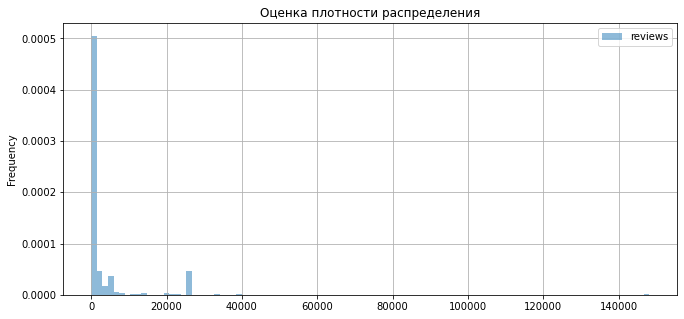

In [9]:
# Вывод уникальных значений переменной 
estimation_missing_num_data(data['reviews'])

Данные распеределены очень не раваномерно, при этом колличество пропущенных значений относительно общего колличества является занчительным и составляет более 30,5%. 
Видно, что данные имют явный выброс отностиельно остальных наблюдений, который составляет 148114.00 при этом частота появления данных значений редкая. 

Оценим диапазоны распеределения значений больших чем 25000.  

In [10]:
# Оценка кооличства распределения относительно редких наблюдений 
data.query('reviews > 25000')['reviews'].value_counts(dropna=False)

25902.0     224
25895.0      89
25907.0      31
25883.0      13
33275.0       9
38844.0       8
38633.0       4
148114.0      3
25765.0       3
30064.0       2
148085.0      1
148051.0      1
27992.0       1
25909.0       1
Name: reviews, dtype: int64

In [11]:
# Оценка уникальных значений больших чем 25000 
data.query('reviews > 25000')['reviews'].sort_values().unique()

array([ 25765.,  25883.,  25895.,  25902.,  25907.,  25909.,  27992.,
        30064.,  33275.,  38633.,  38844., 148051., 148085., 148114.])

Используем для заполнения пропусков два метод интерполяция пропущенных значений

In [12]:
# Заполнение пропущенных значений с помощью интерполяции
data['reviews'] = data['reviews'].interpolate( method="nearest")

# Оценка результата
data['reviews'].isnull().sum()

3

Три пропущенных значения остались не заполненными. Удалим их. 

In [13]:
# Удаление пропущенных значений 
data = data.dropna()

In [14]:
# Оценка перуиндексация результата 
data = data.reset_index(drop=True)

In [15]:
# Оценка результатов изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   position     6950 non-null   category
 1   company      6950 non-null   category
 2   description  6950 non-null   category
 3   reviews      6950 non-null   float64 
 4   location     6950 non-null   category
dtypes: category(4), float64(1)
memory usage: 792.4 KB


## SECTION 4.2 CONCLUSIONS

- Удалены дублирующие строки в количестве 10 штук.
- Заполнены пропущенные значения методом интерполяции
- После заполнения данным методом, осталось три пропущенных значения, которые удалены из набора.    


In [16]:
# Сохранение промежуточных результатов 
pd.DataFrame.to_feather(data, 'data_scientist_job_market_in_the_us.file')

In [17]:
# Сохраниение результатов итоговых результатов
data.to_csv('data_scientist_job_market_in_the_us.csv', sep=',', index=True, encoding='utf-8')